Consider the reaction e+ e- -> Lambda_c+ anti-Lambda_c- at a CMS energy of 4.6 GeV. 2000 event are generated by the hit-or-miss generator below (if you are interested in the details, have a look at for example 2.3 http://www.physik.uzh.ch/~andreasp/mc/mchowto.pdf , but it is not necessary to perform this task).

The Lambda_c are produced at an angle theta with respect to the incoming e+/e- beam according to W(cos(theta))= 1+alpha*cos^2(theta). In our case, we use alpha=0.2 as input. 

a) Express alpha and its variance in terms of the moment <cos^2(theta)>.
b) Implement a simple MM algorithm below and calculate alpha and its variance from the simulated data.



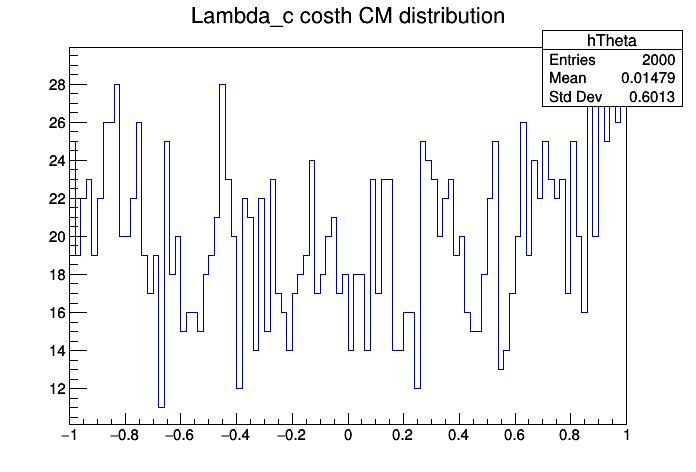

In [1]:
Int_t nevt=2000, nbin=100, i=0, j=0;

  TH1D *hTheta = new TH1D("hTheta","Lambda_c costh CM distribution", nbin, -1.0, 1.0);

  Double_t randnum1[10000];  //random number array
  Double_t randnum2[10000];  //random number array
  Double_t mlam=2.28646; //hyperon mass
  Double_t cms=4.6;  //centre of mass energy
  Double_t alpha=0.2; // ratio between G_E and G_M
  Double_t tau=cms*cms/(4.*mlam*mlam); //phase space factor
  Double_t costh=0.; //initializing variables
  gRandom= new TRandom3(0);

  gRandom->RndmArray(10000, randnum1);  //generate random numbers uniformly between 0 and 1
  gRandom->RndmArray(10000, randnum2);  //generate random numbers uniformly between 0 and 1
  //Now go through all random numbers one by one
  while(i<nevt)
    {
      costh=-1.+2.*randnum1[j]; //the random numbers interval is shifted to between -1 and 1
      Double_t dsdcosth=1+alpha*costh*costh;   //calculating the angular distribution factor
      Double_t upperlim=1.+fabs(alpha);  //calculating the upper limit

      if(randnum2[j]<dsdcosth/upperlim)   //hit-or-miss criterion
	{

	  hTheta->Fill(costh);  //fill histogram
	  i=i+1;
	}

      j=j+1;
    }

TCanvas *can1 = new TCanvas();
hTheta->Draw();   //Draw histogram
can1->Draw();